In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#tips 데이터셋 로드
tips =sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 ->[총금액,팁,성별,흡연여부,요일,시간,인원]
2. 총금액 , 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 지원과 성별에 따른 (그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바 그래프)

In [4]:
tips.columns=['총금액','팁','성별','흡연여부','요일','시간','인원']

In [5]:
import math

In [6]:
tips['총금액']=round(tips['총금액'],1)
tips['팁']=round(tips['팁'],1)

In [7]:
# 팁의 비율이라는 파생변수 생성
tips['팁의비율']=tips['팁']/tips['총금액']*100
tips.head()

,총금액,팁,성별,흡연여부,요일,시간,인원,팁의비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146


In [8]:
# 그룹화


tips.groupby(['인원','성별']).mean()["팁의비율"]

C:\Users\dgh06\AppData\Local\Temp\ipykernel_16800\1818245941.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['인원','성별']).mean()["팁의비율"]


인원  성별    
1   Male      22.093023
    Female    21.322912
2   Male      16.273796
    Female    17.053626
3   Male      14.763093
    Female    16.025679
4   Male      15.017047
    Female    13.267871
5   Male      13.371547
    Female    17.114094
6   Male      14.953486
    Female    16.306239
Name: 팁의비율, dtype: float64

In [9]:
group_data=tips.groupby(['인원','성별']).mean()
group_data
#group_data=tips[['인원','성별','팁의비율']].groupby[['인원','성별']].mean()

C:\Users\dgh06\AppData\Local\Temp\ipykernel_16800\2831888616.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data=tips.groupby(['인원','성별']).mean()


총금액         팁       팁의비율
인원 성별                                    
1  Male     8.600000  1.900000  22.093023
   Female   6.800000  1.266667  21.322912
2  Male    17.106122  2.615306  16.273796
   Female  15.344828  2.525862  17.053626
3  Male    24.291667  3.475000  14.763093
   Female  21.550000  3.257143  16.025679
4  Male    28.078571  4.171429  15.017047
   Female  30.277778  4.022222  13.267871
5  Male    30.150000  3.750000  13.371547
   Female  29.800000  5.100000  17.114094
6  Male    41.250000  5.850000  14.953486
   Female  28.400000  4.600000  16.306239

In [10]:
import matplotlib.pyplot as plt
import platform

<Axes: xlabel='인원,성별'>

C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\dgh06\AppData\Roaming\Python\Py

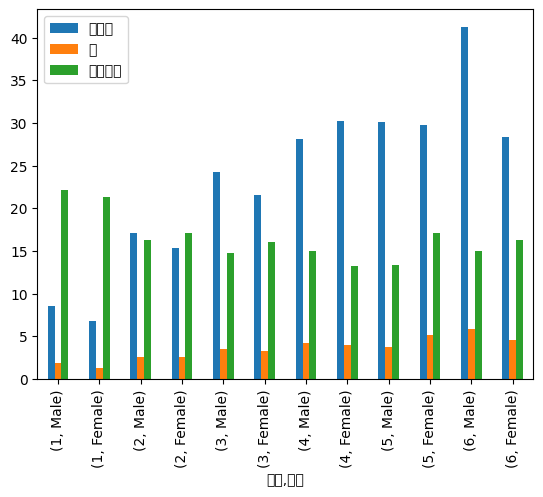

In [11]:
group_data.plot.bar()

In [12]:
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

In [13]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

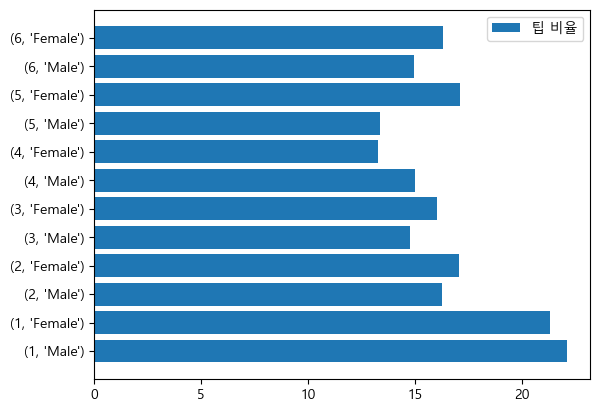

In [14]:
# 인덱스가 튜플의 형태라 x=group_data.index는 오류가 남 
x=list(range(0,len(group_data.index)))  # 길이만큼 넣고 그리고 이름을 인덱스로의 것으로 바꾼다
y=group_data['팁의비율']

plt.barh(x,y,label='팁 비율')
plt.yticks(x, group_data.index)
plt.legend()
plt.show()

In [15]:
group_data

총금액         팁       팁의비율
인원 성별                                    
1  Male     8.600000  1.900000  22.093023
   Female   6.800000  1.266667  21.322912
2  Male    17.106122  2.615306  16.273796
   Female  15.344828  2.525862  17.053626
3  Male    24.291667  3.475000  14.763093
   Female  21.550000  3.257143  16.025679
4  Male    28.078571  4.171429  15.017047
   Female  30.277778  4.022222  13.267871
5  Male    30.150000  3.750000  13.371547
   Female  29.800000  5.100000  17.114094
6  Male    41.250000  5.850000  14.953486
   Female  28.400000  4.600000  16.306239

In [16]:
male_data =pd.DataFrame()
female_data =pd.DataFrame()

for i in group_data.index:
    if(i[1])=='Male':
        male_data=pd.concat([male_data,group_data[['팁의비율']].loc[[i]]])
    else:
        female_data=pd.concat([female_data,group_data[['팁의비율']].loc[[i]]])


In [17]:
male_data
female_data

,,팁의비율
인원,성별,
1,Female,21.322912
2,Female,17.053626
3,Female,16.025679
4,Female,13.267871
5,Female,17.114094
6,Female,16.306239


<function matplotlib.pyplot.show(close=None, block=None)>

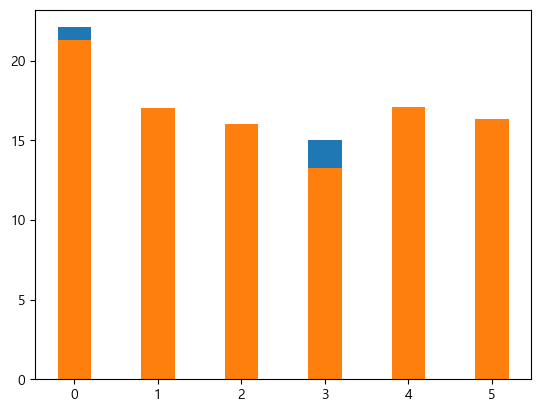

In [18]:
x=list(range(len(male_data)))
y=male_data['팁의비율']

x2=list(range(len(female_data)))
y2=female_data['팁의비율']


plt.bar(x,y,width=0.4)
plt.bar(x2,y2,width=0.4)
plt.show

# pivot table
1. 그룹화
2. 인덱스,컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다

In [19]:
pivot_data=pd.pivot_table(
    
    tips,
    index='인원',
    columns='성별',
    values=['팁의비율'],
    aggfunc='mean'
)
pivot_data

팁의비율           
성별       Male     Female
인원                      
1   22.093023  21.322912
2   16.273796  17.053626
3   14.763093  16.025679
4   15.017047  13.267871
5   13.371547  17.114094
6   14.953486  16.306239

<Axes: xlabel='인원'>

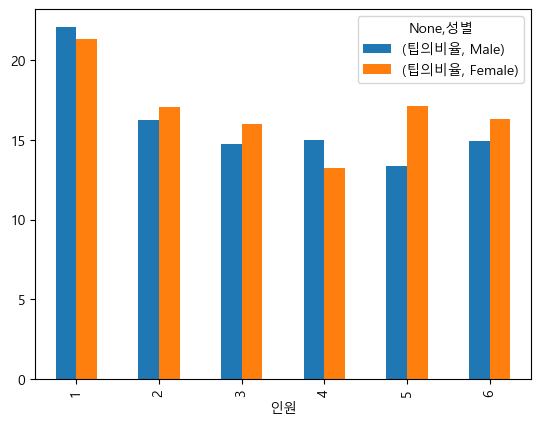

In [20]:
pivot_data.plot.bar()

In [21]:
import seaborn as sns

<Axes: xlabel='None-성별', ylabel='인원'>

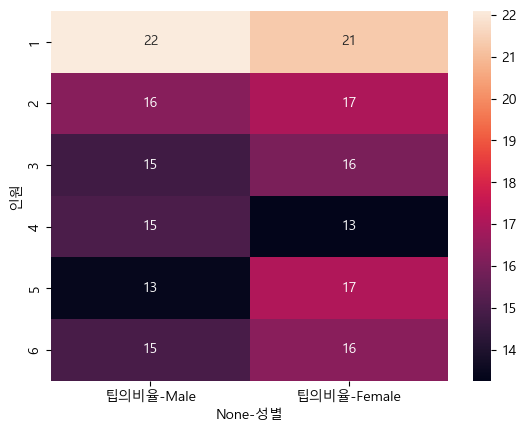

In [22]:
sns.heatmap(pivot_data, annot=True )